In [8]:
# Install required packages
!pip install pandas matplotlib seaborn nltk wordcloud

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.util import ngrams

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')  # CHANGED: Already included, but keeping for clarity
nltk.download('averaged_perceptron_tagger_eng')  # NEW: Added to fix LookupError

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Load dataset
file_path = '/content/drive/MyDrive/MentalBERT_Project/data/depressed_mood_10K.csv'
df = pd.read_csv(file_path)

# Inspect data
print("Dataset Info:")
print(df.info())
print("\nSample Rows:")
print(df.head())
print("\nSymptom Counts:")
print(df['symptom'].value_counts())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  object 
 1   created_at    10000 non-null  object 
 2   title         10000 non-null  object 
 3   selftext      10000 non-null  object 
 4   author        10000 non-null  object 
 5   score         10000 non-null  int64  
 6   upvote_ratio  10000 non-null  float64
 7   num_comments  10000 non-null  int64  
 8   over_18       10000 non-null  bool   
 9   symptom       10000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 713.0+ KB
None

Sample Rows:
        id            created_at  \
0  1hqr7iq  2024-12-31T23:57:33Z   
1  1hqqmlg  2024-12-31T23:24:19Z   
2  1hqqgs7  2024-12-31T23:15:02Z   
3  1hqqajk  2024-12-31T23:05:25Z   
4  1hqpywe  2024-12-31T22:47:42Z   

                                               title 

In [37]:
# Combine title and selftext
df['text'] = df['title'].fillna('') + ' ' + df['selftext'].fillna('')

# Clean text: lowercase, remove punctuation, stopwords
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation, numbers
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]  # Remove stopwords, short words
    return ' '.join(tokens)
df['clean_text'] = df['text'].apply(clean_text)

# Word count
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
print("\nWord Count Stats:")
print(df['word_count'].describe())


Word Count Stats:
count    10000.000000
mean        99.752300
std         91.214528
min          2.000000
25%         42.000000
50%         74.000000
75%        126.000000
max       1317.000000
Name: word_count, dtype: float64


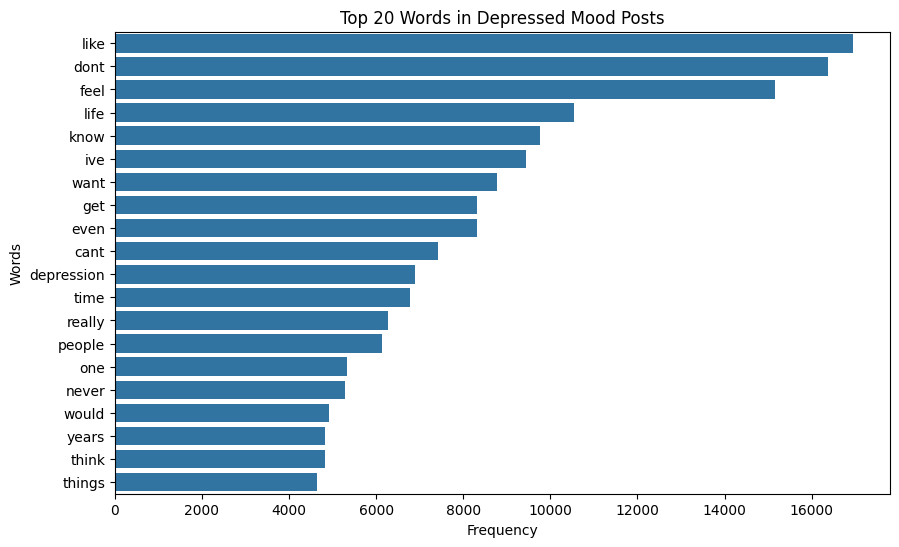

In [38]:
# Word frequencies
all_words = ' '.join(df['clean_text']).split()
word_freq = Counter(all_words)

top_words = word_freq.most_common(20)
words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Words in Depressed Mood Posts')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


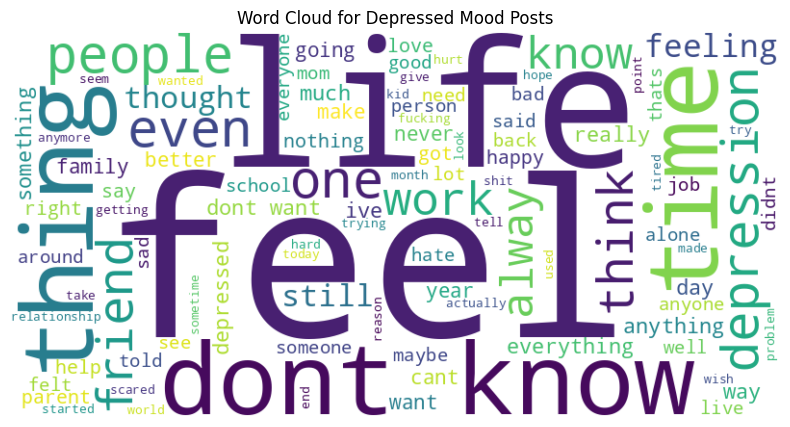

In [40]:
# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, random_state=42).generate(' '.join(all_words))


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Depressed Mood Posts')
plt.show()

In [41]:
# get ngrams
def get_ngrams(text, n):
    tokens = text.split()
    return list(ngrams(tokens, n))

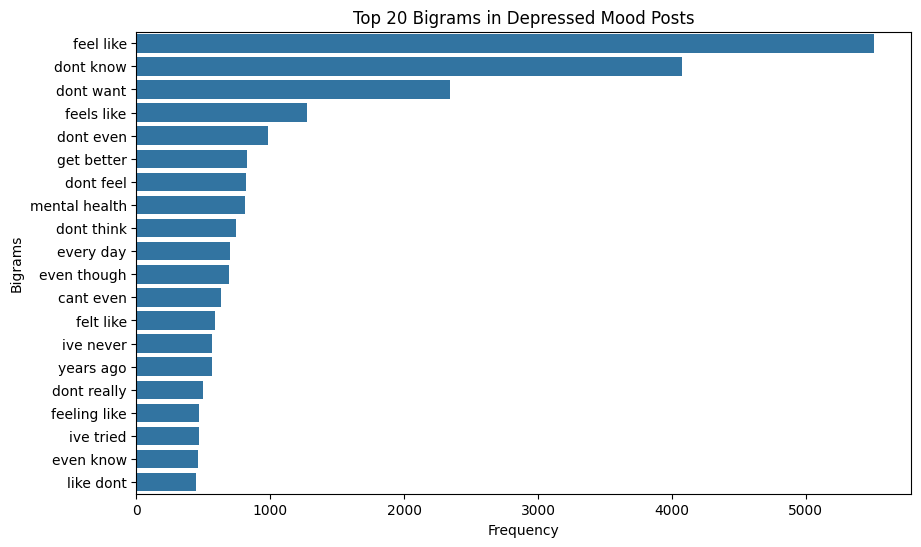

In [42]:
# Bigrams

bigrams = [bigram for text in df['clean_text'] for bigram in get_ngrams(text, 2)]
bigram_freq = Counter(bigrams)

# Bigram bar chart
top_bigrams = bigram_freq.most_common(20)
bigrams, counts = zip(*[( ' '.join(b), c) for b, c in top_bigrams])
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(bigrams))
plt.title('Top 20 Bigrams in Depressed Mood Posts')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

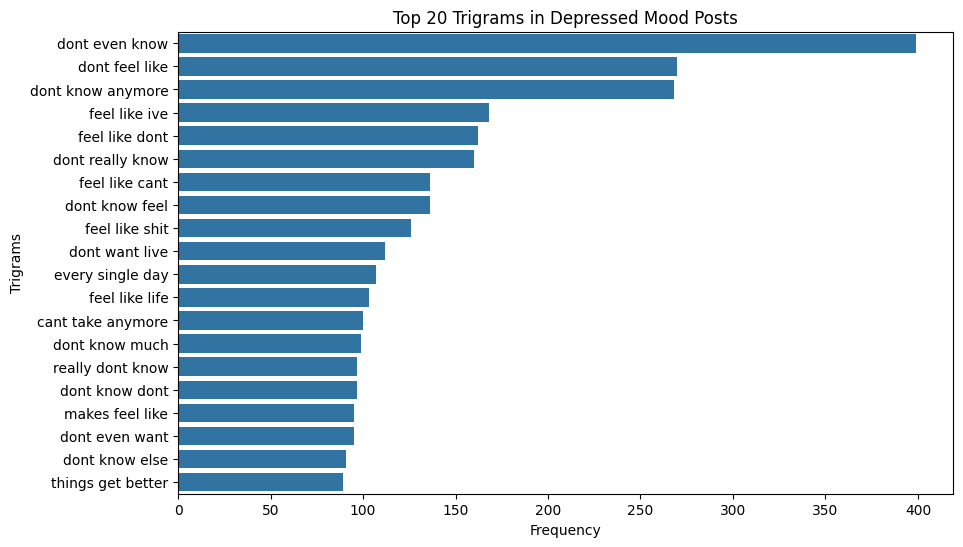

In [43]:
# Trigrams

trigrams = [trigram for text in df['clean_text'] for trigram in get_ngrams(text, 3)]
trigram_freq = Counter(trigrams)

# Trigram bar chart
top_trigrams = trigram_freq.most_common(20)
trigrams, counts = zip(*[( ' '.join(b), c) for b, c in top_trigrams])
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(trigrams))
plt.title('Top 20 Trigrams in Depressed Mood Posts')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()


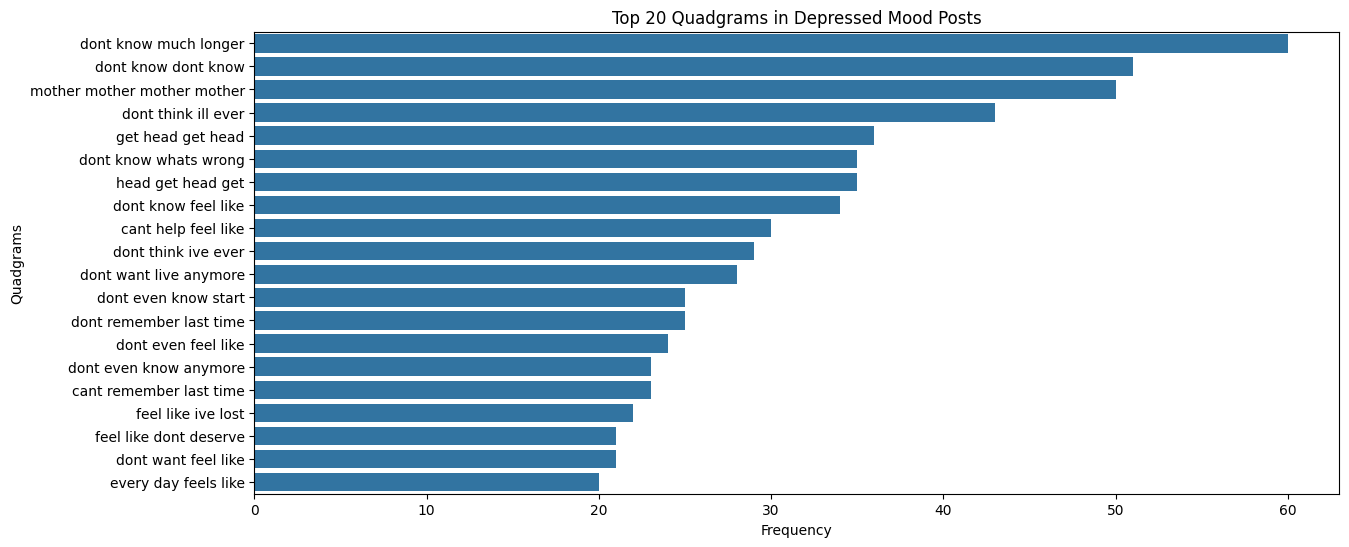

In [46]:
# Quadgrams
quadgrams = [quadgram for text in df['clean_text'] for quadgram in get_ngrams(text, 4)]
quadgram_freq = Counter(quadgrams)

# Quadgram bar chart
top_quadgrams = quadgram_freq.most_common(20)
quadgrams, counts = zip(*[(' '.join(q), c) for q, c in top_quadgrams])
plt.figure(figsize=(14, 6))
sns.barplot(x=list(counts), y=list(quadgrams))
plt.title('Top 20 Quadgrams in Depressed Mood Posts')
plt.xlabel('Frequency')
plt.ylabel('Quadgrams')
plt.show()

/tmp/ipython-input-30-4190545925.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = pd.to_datetime(df['created_at']).dt.to_period('M')  # CHANGED: Removed unit='s' to parse ISO 8601 format


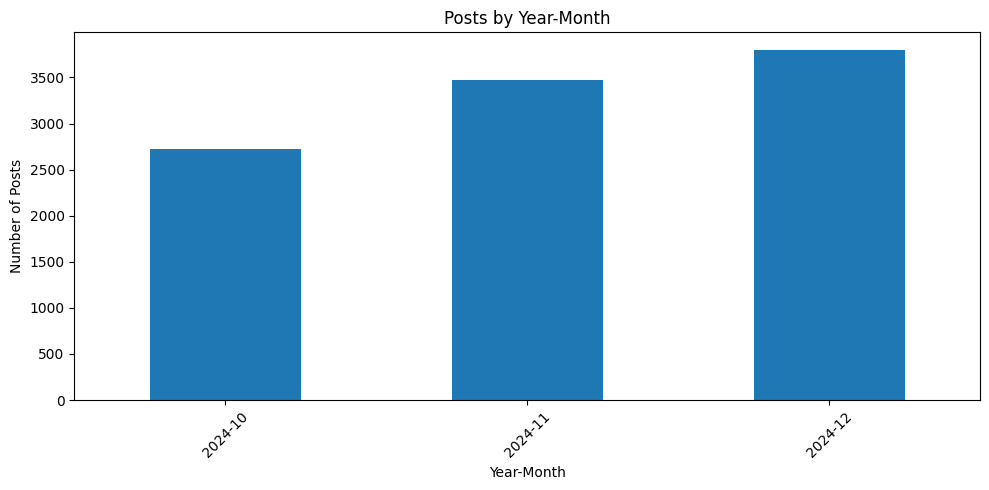

In [30]:

# Posts by year-month
df['year_month'] = pd.to_datetime(df['created_at']).dt.to_period('M')  # CHANGED: Removed unit='s' to parse ISO 8601 format
plt.figure(figsize=(10, 5))
df['year_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Posts by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

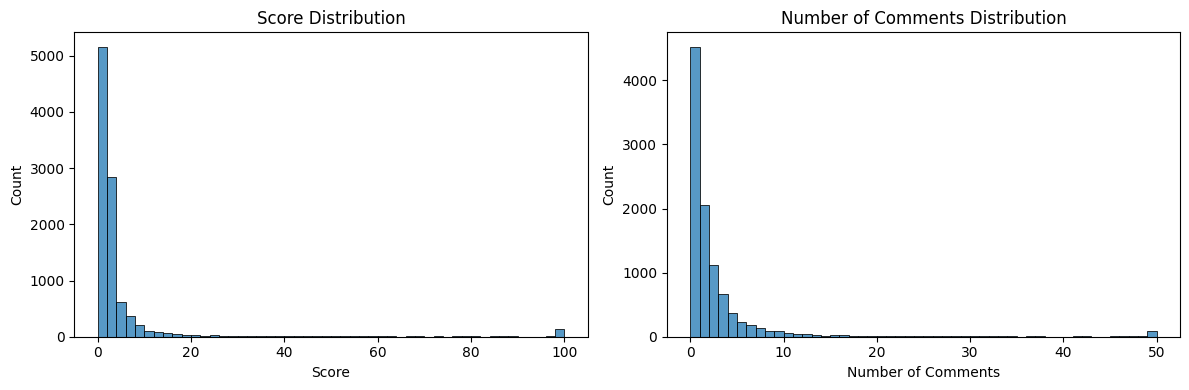

In [31]:
# Engagement distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['score'].clip(upper=100), bins=50)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.subplot(1, 2, 2)
sns.histplot(df['num_comments'].clip(upper=50), bins=50)
plt.title('Number of Comments Distribution')
plt.xlabel('Number of Comments')
plt.tight_layout()
plt.show()

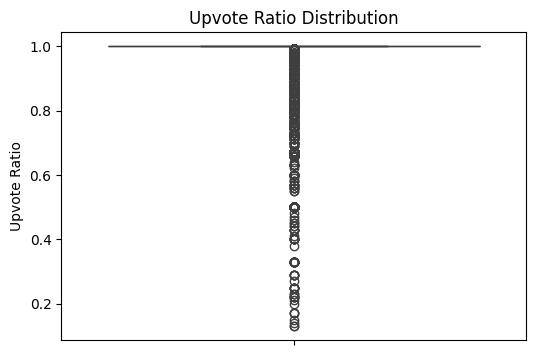

In [32]:
# Upvote ratio boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['upvote_ratio'])
plt.title('Upvote Ratio Distribution')
plt.ylabel('Upvote Ratio')
plt.show()

In [33]:
# Sentiment analysis
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
print("\nSentiment Stats:")
print(df['sentiment'].describe())



Sentiment Stats:
count    10000.000000
mean        -0.334526
std          0.742842
min         -0.999800
25%         -0.947900
50%         -0.759550
75%          0.414300
max          0.999700
Name: sentiment, dtype: float64


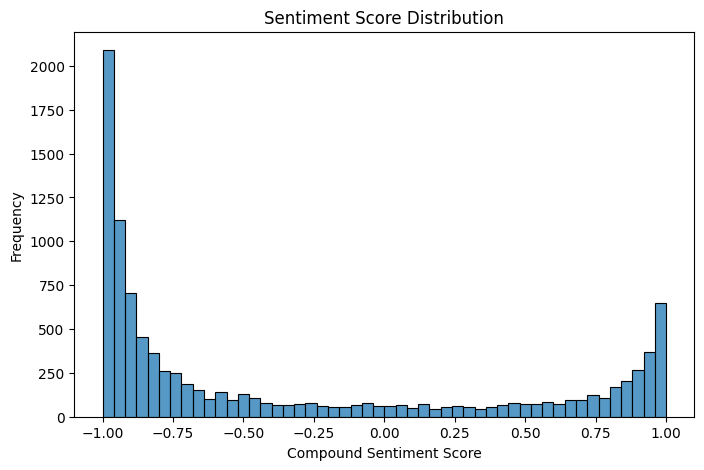

In [34]:
# Sentiment distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], bins=50)
plt.title('Sentiment Score Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [16]:
for col in df.columns:
    print(f"{col}: {df.iloc[0][col]}")

id: 1hqr7iq
created_at: 2024-12-31T23:57:33Z
title: How do I get over New Year’s depression? It happens to me every year.
selftext: Just to clarify I (18m) am pretty much always depressed and have been depressed for about 5 years. It’s just the New Year’s holiday makes me feel especially alone. I was born with significant mental barriers that prevent me from having adequate social skills to make friends and I have ASD. It’s very difficult for me to see others succeed at being the absolute best at socializing with others and going to all the parties on the New Year’s holiday, because I know I’m too much of a loser to be involved in that anyways. I feel like even if I was invited to a party I would be afraid to go because my anxiety (or people just actually despise) has convinced that people are disgusted by me just by looking at me, therefore, I ruin everything. If somebody would please talk to me about this I just feel so alone please 🙏
author: BamaTan
score: 1
upvote_ratio: 1.0
num_co

In [35]:
# POS tagging: adjectives
def get_adjectives(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    return [word for word, pos in tagged if pos.startswith('JJ')]
adjectives = [adj for text in df['clean_text'] for adj in get_adjectives(text)]
adj_freq = Counter(adjectives)
print("\nTop 10 Adjectives:", adj_freq.most_common(10))


Top 10 Adjectives: [('ive', 7835), ('dont', 4126), ('cant', 4090), ('good', 3226), ('much', 3140), ('bad', 2841), ('happy', 2687), ('last', 2073), ('hard', 1978), ('sad', 1885)]
